In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms
import torchvision.models as models

import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets

import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import cv2

train_on_gpu = torch.cuda.is_available()

In [0]:
categories =  ("cardboard", "glass", "metal", "paper", "plastic", "trash")

In [0]:
transform = transforms.Compose([
    transforms.ToTensor()])

In [0]:
DATADIR = "D:\Studies_extra\Projects\Garbage_Classification\Data"

In [5]:
img_size = 64
training_data = []
def create_training_data():
  for category in categories:
    path = DATADIR + "\\" + category
    class_num = categories.index(category)
    
    print(categories.index(category))
    print("Number of images in "+category + " = " + str(len(os.listdir(path))))
    for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img))
          new_array = cv2.resize(img_array,(img_size,img_size))
          npimg = np.asarray(new_array)
          new_array = np.transpose(npimg,(2,0,1))
          #new_array = torch.FloatTensor(new_array)
          #class_numb= torch.FloatTensor(class_num)
          class_numb = [class_num]
          training_data.append([new_array,class_num])

        except Exception as e:
          pass
  return training_data

training_data = create_training_data()

0
Number of images in cardboard = 403
1
Number of images in glass = 501
2
Number of images in metal = 410
3
Number of images in paper = 594
4
Number of images in plastic = 482
5
Number of images in trash = 137


In [6]:
import random
random.shuffle(training_data)
len(training_data)

2527

In [0]:
full_data = training_data
train_size = int(0.8 * len(full_data))
test_size = len(full_data) - train_size

train_data, validationtest_data = random_split(full_data, [train_size, test_size])
test_size = int(0.5*len(validationtest_data))
validation_data,test_data = random_split(validationtest_data,[test_size, test_size])
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=32, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False)
validationtest_loader = torch.utils.data.DataLoader(validationtest_data, batch_size=32, shuffle=False)

In [0]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1, shuffle=False)

In [0]:
dict = {"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,} 

for i in range(len(test_data)):
  print(test_data[i][1])
  dict[str(test_data[i][1])] += 1

4
0
1
2
4
1
3
4
1
1
3
4
0
3
4
2
0
3
3
5
2
3
2
2
3
1
1
0
2
5
1
4
2
0
3
3
1
4
3
3
2
2
0
1
4
2
3
4
4
3
4
4
4
3
1
1
4
3
3
4
0
2
3
4
2
3
1
0
4
2
4
4
5
4
2
1
4
1
5
3
2
4
1
2
1
3
0
1
1
2
3
4
3
1
4
5
1
3
0
0
0
4
0
5
0
5
3
4
4
2
3
3
1
1
4
0
4
2
4
1
3
4
1
4
1
0
0
3
3
3
5
3
1
0
1
4
0
0
2
3
1
0
4
0
3
5
4
0
3
3
0
3
4
2
4
0
1
3
0
1
1
1
4
4
3
2
1
5
4
2
3
3
4
4
3
4
1
3
3
0
1
0
1
3
2
5
3
4
2
0
4
1
1
3
0
4
2
3
0
2
2
1
0
3
4
3
3
4
2
3
1
4
2
4
4
1
0
0
3
3
3
2
1
4
0
3
4
1
4
4
4
0
4
3
3
3
2
3
1
0
3
3
3
1
0
4
1
1
0
4
1
3
1


In [0]:
print(dict)

<class 'dict'>


In [0]:
for batch_id, data in enumerate(train_loader):
  inputs, label = data
  print((inputs).shape)
  print(label.shape)
  break

torch.Size([32, 3, 64, 64])
torch.Size([32])


In [0]:
def train(epochs):
  model.train()
  log_interval = 5
  for batch_id, data in enumerate(train_loader):
    inputs, label = data
    opt.zero_grad()
    #arr = []
    #arr.append(inputs)
    #print(len(arr[0]))
    inputs = inputs.type(torch.FloatTensor)
    output = model((inputs).to(st))
    ind, val = torch.max(output,1) 
    val1 = label

    label = label.type(torch.LongTensor)
    loss = loss_fn(output, (label).to(st)) 
    loss.backward()
    opt.step()
    #train_loss.append(loss.data.item)
    if batch_id%log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.3f}'.format(
      epoch, batch_id * len(inputs), len(train_loader.dataset),
      100. * batch_id / len(train_loader), loss.data.item()))

In [0]:
gr = 0
def test(epoch,gr):
    
    model.eval()
    test_loss = 0
    c = 0
    v = 0
    confusion_matrix = np.zeros([10, 10])
    tot = len(validation_data)

    with torch.no_grad():
        
        for batch_id, data in enumerate(validation_loader):
            inputs, label = data            
            inputs = inputs.type(torch.FloatTensor)
            output = model((inputs).to(st))
            ind,val = torch.max(output,1)
            #test_loss += sum(abs(1-ind))
            val1 = label
            v += (val==val1.to(st)).sum().item()           
        vowel_test_accuracy = 100.0 * v / tot
        consonant_test_accuracy = 100.0 * c / tot
        pos = (epoch + 1) * tot
        print("Number of Correct Predictions: "+str(v))
        print("Total  Accuracy: "+str(vowel_test_accuracy))
        print("Total data: "+str(tot))
        #test_loss = test_loss/len(validation_data)
        #val_loss.append(test_loss)
        acc.append(vowel_test_accuracy)
        if acc[len(acc)-1]>gr:
          gr = acc[len(acc)-1]
          print("Higest accuracy: "+str(gr))

In [0]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False

In [13]:
feature_extract = True
epoch = 20
i = 0
st = 'cuda:0'
acc = []
train_loss = []
val_loss = []
model = models.resnet18(pretrained= True)
model.fc = nn.Linear(512,6, bias = True)
model.sf = nn.Softmax()
gr = 0
for lr in [0.0001]:
  j = 0
  i+=1
  model = models.resnet18(pretrained= True)
  model.fc = nn.Linear(512,6, bias = True)
  model.sf = nn.Softmax()
  set_parameter_requires_grad(model, feature_extract)
  params_to_update = [model.fc.weight,model.fc.bias]
  model.to(st)
  model.fc.weight.requires_grad = True
  model.fc.bias.requires_grad = True
  if feature_extract == True:
    for name,param in model.named_parameters():
          if param.requires_grad == True:
              params_to_update.append(param)
  j+=1

  #expt_id = '%d_%d_%d_%d' % (int(lr*100), int(momentum*100), int(i),int(j) )

  #print('\nLR = %.2f, Momentum = %.2f ' % (lr, momentum))


  loss_fn = nn.CrossEntropyLoss()
  opt = optim.Adam(params_to_update, lr=lr)
  for epoch in range(1, epoch + 1):
    train(epoch)
    test(epoch,gr)


Train Epoch: 1 [0/2021 (0%)]	Loss: 1.853
Train Epoch: 1 [160/2021 (8%)]	Loss: 1.919
Train Epoch: 1 [320/2021 (16%)]	Loss: 1.910
Train Epoch: 1 [480/2021 (23%)]	Loss: 1.898
Train Epoch: 1 [640/2021 (31%)]	Loss: 2.025
Train Epoch: 1 [800/2021 (39%)]	Loss: 1.565
Train Epoch: 1 [960/2021 (47%)]	Loss: 1.753
Train Epoch: 1 [1120/2021 (55%)]	Loss: 1.845
Train Epoch: 1 [1280/2021 (62%)]	Loss: 1.673
Train Epoch: 1 [1440/2021 (70%)]	Loss: 1.756
Train Epoch: 1 [1600/2021 (78%)]	Loss: 1.659
Train Epoch: 1 [1760/2021 (86%)]	Loss: 1.507
Train Epoch: 1 [1920/2021 (94%)]	Loss: 1.684
Number of Correct Predictions: 78
Total  Accuracy: 30.8300395256917
Total data: 253
Higest accuracy: 30.8300395256917
Train Epoch: 2 [0/2021 (0%)]	Loss: 1.517
Train Epoch: 2 [160/2021 (8%)]	Loss: 1.558
Train Epoch: 2 [320/2021 (16%)]	Loss: 1.607
Train Epoch: 2 [480/2021 (23%)]	Loss: 1.612
Train Epoch: 2 [640/2021 (31%)]	Loss: 1.716
Train Epoch: 2 [800/2021 (39%)]	Loss: 1.268
Train Epoch: 2 [960/2021 (47%)]	Loss: 1.549
Trai

In [0]:
print(acc)

[26.48221343873518, 40.316205533596836, 49.40711462450593, 54.1501976284585, 55.73122529644269, 56.91699604743083, 58.49802371541502, 60.07905138339921, 62.055335968379445, 61.6600790513834, 61.6600790513834, 62.055335968379445, 62.45059288537549, 62.45059288537549, 62.45059288537549, 62.45059288537549, 62.055335968379445, 63.241106719367586, 63.241106719367586, 63.63636363636363]


In [0]:
#torch.save(model,"bettermodel66%testacc.pt")
model = torch.load("bettermodel66%testacc.pt")

In [0]:
model.to(st)  

for batch_id, data in enumerate(train_loader):
  inputs, label = data
  inputs.to(st)
  label.to(st)
  inputs = inputs.type(torch.FloatTensor)
  break
outputs = model(inputs.to(st))

In [0]:
print(outputs[0])

tensor([-4.8682,  0.6726,  1.7821, -1.4212, -2.4196, -4.5058], device='cuda:0',
       grad_fn=<SelectBackward>)


In [0]:
print(label[0])

tensor(2)


#Performance of the model on Test Set

In [43]:

c = 0
v = 0
tot = len(validationtest_data)    
for batch_id, data in enumerate(validationtest_loader):
    inputs, label = data            
    inputs = inputs.type(torch.FloatTensor)
    output = model((inputs).to(st))
    ind,val = torch.max(output,1)
    val1 = label
    v += (val==val1.to(st)).sum().item()           
vowel_test_accuracy = 100.0 * v / tot
consonant_test_accuracy = 100.0 * c / tot
pos = (epoch + 1) * tot
print("Number of Correct Predictions: "+str(v))
print("Total  Accuracy: "+str(vowel_test_accuracy))
print("Total data: "+str(tot))

Number of Correct Predictions: 358
Total  Accuracy: 70.75098814229248
Total data: 506


In [0]:
def gettype(label):
  if(label == 0 or label == 3):
    return 0
  else:
    return 1

In [45]:

c = 0
v = 0
envpred = 0
tot = len(test_data)    
for batch_id, data in enumerate(test_loader):
    inputs, label = data            
    inputs = inputs.type(torch.FloatTensor)
    output = model((inputs).to(st))
    ind,val = torch.max(output,1)
    val1 = label
    v += (val==val1.to(st)).sum().item()  
    val = gettype(val)
    val1 = gettype(val1)
    envpred += (val==val1)

vowel_test_accuracy = 100.0 * v / tot
consonant_test_accuracy = 100.0 * c / tot
pos = (epoch + 1) * tot
print("Number of Correct Predictions: "+str(v))
print("Total  Accuracy: "+str(vowel_test_accuracy))
print("Total data: "+str(tot))
print("Total main predictions: "+ str(envpred/tot*100))

Number of Correct Predictions: 172
Total  Accuracy: 67.98418972332016
Total data: 253
Total main predictions: 87.74703557312253


#Well that seems decent, lemme try it out on stuff from real life :P 

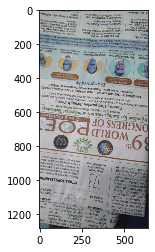

tensor([[-0.0208, -3.7152, -1.9255,  0.5015, -1.6577, -3.2183]],
       device='cuda:0', grad_fn=<AddmmBackward>)
paper
Biodegradable


In [46]:
img_array = cv2.imread("newspaper.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

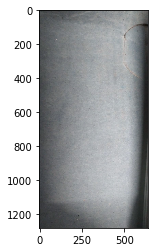

tensor([[ 0.5360, -0.0429, -0.6598, -1.0110, -2.4424, -0.4394]],
       device='cuda:0', grad_fn=<AddmmBackward>)
cardboard
Biodegradable


In [47]:
img_array = cv2.imread("Cardboardbox.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

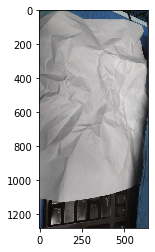

tensor([[-1.3964, -1.6413, -1.1983, -0.5774, -3.2454, -1.9375]],
       device='cuda:0', grad_fn=<AddmmBackward>)
paper
Biodegradable


In [48]:
img_array = cv2.imread("crumplepaper2.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

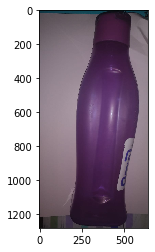

tensor([[-1.2845, -1.2023, -2.5101, -1.4627, -0.1485, -3.9448]],
       device='cuda:0', grad_fn=<AddmmBackward>)
plastic
Non Biodegradable


In [49]:
img_array = cv2.imread("bottle.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

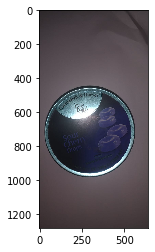

tensor([[-0.5262,  0.0281, -0.0502, -0.2907, -1.5882, -0.5995]],
       device='cuda:0', grad_fn=<AddmmBackward>)
glass
Non Biodegradable


In [50]:
img_array = cv2.imread("metalbox.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

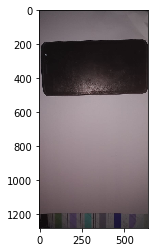

tensor([[-1.1442, -0.8210, -0.3628, -0.3957, -1.3102, -3.2390]],
       device='cuda:0', grad_fn=<AddmmBackward>)
metal
Non Biodegradable


In [51]:
img_array = cv2.imread("phone.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

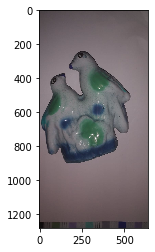

tensor([[ 2.3061,  0.2168, -2.1281, -3.2686, -2.1195, -1.7507]],
       device='cuda:0', grad_fn=<AddmmBackward>)
cardboard
Biodegradable


In [52]:
img_array = cv2.imread("weirdglassbirds2.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

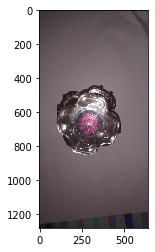

tensor([[-1.3070,  0.0130, -1.1774, -3.3048,  1.0990, -3.3570]],
       device='cuda:0', grad_fn=<AddmmBackward>)
plastic
Non Biodegradable


In [53]:
img_array = cv2.imread("scentbottle2.jpeg")
new_array = cv2.resize(img_array,(img_size,img_size))
npimg = np.asarray(new_array)
plt.imshow(img_array)
plt.show()
new_array = np.transpose(npimg,(2,0,1))
new_array = torch.from_numpy(new_array)
new_array = new_array.type(torch.FloatTensor)
new_array = new_array.unsqueeze(0)
output = model((new_array).to(st))
print(output)
_,val = torch.max(output,1)
print(categories[val.item()])
if(val.item() == 0 or val.item() == 3):
  print("Biodegradable")
else:
  print("Non Biodegradable")

#Oof this didn't work exactly as I had planned. Wot do? :x